In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, irfft

### Homework 3.5 - Noise Reduction

We will try to reduce audio noise using the Fourier trick I shown in the lecture.

In this problem, you will have to make a short record of about 5-10 seconds with a auditable background noise. The source of noise can be fan, air condition, etc. Make sure the noise is constant throughout the audio so that we can easily pick up the noise in the frequency domain.

Be careful the copyrighted materials.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

Put the data into an array using wavfile from scipy.io. This will give us a tuple of the sampling rate (frequency (freq)) and the data (y).

In [2]:
freq, y = wavfile.read('noise_reduction_original.wav')

In [3]:
freq

16000

In [4]:
y

array([  0,   0,   0, ..., 492, 395, 223], dtype=int16)

Create a time array by computing the interval between the data points. Since the data points are separated by 1/freq (dt), we can create the array that has dt as an interval between the data points.

In [5]:
dt = 1/freq
t = np.linspace(0, (len(y)-1)*dt, len(y))

In [6]:
dt

6.25e-05

In [7]:
t

array([0.0000000e+00, 6.2500000e-05, 1.2500000e-04, ..., 6.0798125e+00,
       6.0798750e+00, 6.0799375e+00])

Plot t and y in the time domain.

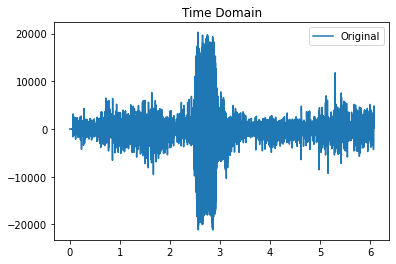

In [8]:
plt.plot(t, y, label='Original')
plt.title('Time Domain')
plt.legend()

Convert into the frequency domain.

yf is the complex array of fourier transform of y.
xf is the frequency domain of the interval between data points.
To plot, we need to convert yf, the complex array, to the absolute of yf.

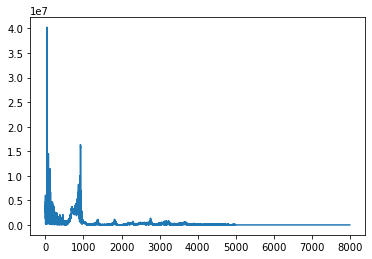

In [9]:
n = len(t)
yf = rfft(y)
xf = rfftfreq(n, dt)
plt.plot(xf, np.abs(yf))

Although there is a peak at the very beginning, it should not be our signal as it is at 0, so it might be an error when converting the data instead. Thus, the peak frequency is approximately between 550 and 1100 while the rest is the noise. 

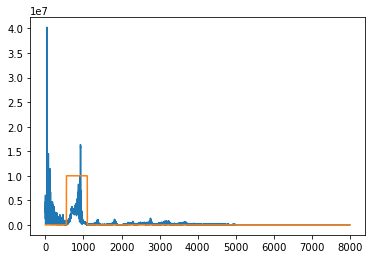

In [10]:
mask = np.where(np.logical_and(xf > 550, xf < 1100), 1, 0)
plt.plot(xf, np.abs(yf))
plt.plot(xf, mask * 1e7)

Apply the mask onto the signal.

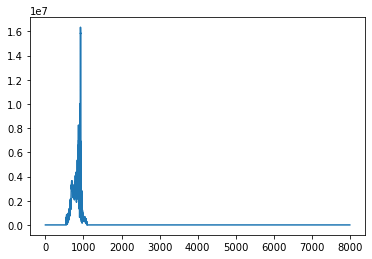

In [11]:
yf_clean = yf * mask
plt.plot(xf, np.abs(yf_clean))

Reverting back into the original signal.

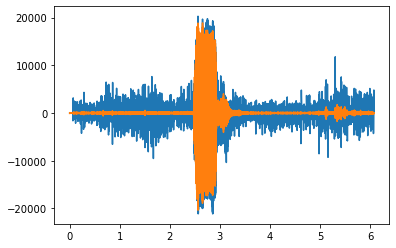

In [12]:
new_f_clean = irfft(yf_clean)
plt.plot(t, y)
plt.plot(t, new_f_clean)

Save it using wavfile.write(filename, sampling rate, array in int16).

In [13]:
wavfile.write('noise_reduction_reduced.wav', freq, np.array(new_f_clean, dtype=np.int16))